[-1  0  1  2  3] 聚类簇的个数为： 4
[-1  0  1  2  3] 聚类簇的个数为： 4
[-1  0  1  2  3  4] 聚类簇的个数为： 5
[-1  0] 聚类簇的个数为： 1
[-1  0  1] 聚类簇的个数为： 2
[-1  0  1  2  3] 聚类簇的个数为： 4


C:\Users\23665\AppData\Local\Temp\ipykernel_19720\1810428780.py:71: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data[cur, 0], data[cur, 1], s=30, c=clr, edgecolors='k')
C:\Users\23665\AppData\Local\Temp\ipykernel_19720\1810428780.py:73: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data[cur & core_indices][:, 0], data[cur & core_indices][:, 1], s=60, c=clr, marker='o', edgecolors='k')
C:\Users\23665

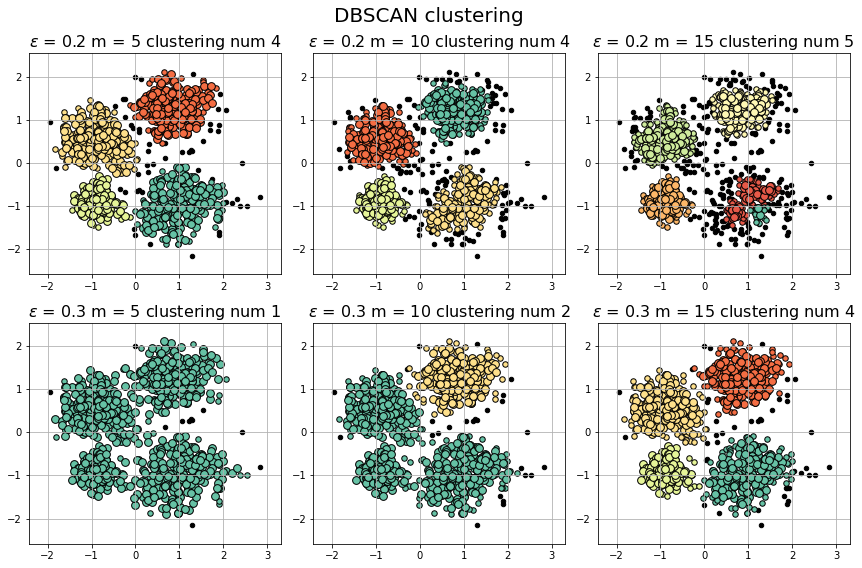

In [1]:
# 参考https://blog.csdn.net/hb707934728/article/details/71515160
#
# 官方示例 https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors

import sklearn.datasets as ds
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


def expand(a, b):
    d = (b - a) * 0.1
    return a-d, b+d


if __name__ == "__main__":
    N = 1000
    centers = [[1, 2], [-1, -1], [1, -1], [-1, 1]]
    #scikit中的make_blobs方法常被用来生成聚类算法的测试数据，直观地说，make_blobs会根据用户指定的特征数量、
    # 中心点数量、范围等来生成几类数据，这些数据可用于测试聚类算法的效果。
    #函数原型：sklearn.datasets.make_blobs(n_samples=100, n_features=2,
    # centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)[source]
    #参数解析：
    # n_samples是待生成的样本的总数。
    #
    # n_features是每个样本的特征数。
    #
    # centers表示类别数。
    #
    # cluster_std表示每个类别的方差，例如我们希望生成2类数据，其中一类比另一类具有更大的方差，可以将cluster_std设置为[1.0, 3.0]。
    data, y = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=[0.5, 0.25, 0.7, 0.5], random_state=0)
    data = StandardScaler().fit_transform(data)
    # 数据1的参数：(epsilon, min_sample)
    params = ((0.2, 5), (0.2, 10), (0.2, 15), (0.3, 5), (0.3, 10), (0.3, 15))

    plt.figure(figsize=(12, 8), facecolor='w')
    plt.suptitle(u'DBSCAN clustering', fontsize=20)

    for i in range(6):
        eps, min_samples = params[i]
        #参数含义：
        #eps:半径，表示以给定点P为中心的圆形邻域的范围
        #min_samples:以点P为中心的邻域内最少点的数量
        #如果满足,以点P为中心,半径为EPS的邻域内点的个数不少于MinPts,则称点P为核心点
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(data)
        y_hat = model.labels_

        core_indices = np.zeros_like(y_hat, dtype=bool)  # 生成数据类型和数据shape和指定array一致的变量
        core_indices[model.core_sample_indices_] = True  # model.core_sample_indices_ border point位于y_hat中的下标

        # 统计总共有积累，其中为-1的为未分类样本
        y_unique = np.unique(y_hat)
        n_clusters = y_unique.size - (1 if -1 in y_hat else 0)
        print (y_unique, '聚类簇的个数为：', n_clusters)

        plt.subplot(2, 3, i+1) # 对第几个图绘制，2行3列，绘制第i+1个图
        # plt.cm.spectral https://blog.csdn.net/robin_Xu_shuai/article/details/79178857
        clrs = plt.cm.Spectral(np.linspace(0, 0.8, y_unique.size)) #用于给画图灰色
        for k, clr in zip(y_unique, clrs):
            cur = (y_hat == k)
            if k == -1:
                # 用于绘制未分类样本
                plt.scatter(data[cur, 0], data[cur, 1], s=20, c='k')
                continue
            # 绘制正常节点
            plt.scatter(data[cur, 0], data[cur, 1], s=30, c=clr, edgecolors='k')
            # 绘制边缘点
            plt.scatter(data[cur & core_indices][:, 0], data[cur & core_indices][:, 1], s=60, c=clr, marker='o', edgecolors='k')
        x1_min, x2_min = np.min(data, axis=0)
        x1_max, x2_max = np.max(data, axis=0)
        x1_min, x1_max = expand(x1_min, x1_max)
        x2_min, x2_max = expand(x2_min, x2_max)
        plt.xlim((x1_min, x1_max))
        plt.ylim((x2_min, x2_max))
        plt.grid(True)
        plt.title(u'$\epsilon$ = %.1f m = %d clustering num %d'%(eps, min_samples, n_clusters), fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()